In [3]:
#https://github.com/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/data_handling/01-accessing-data.ipynb

In [2]:
!pip install climetlab

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.6/158.6 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 59.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 62.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 123.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ..

In [4]:
import climetlab as cml

In [5]:
!test -f test.grib || wget https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib
!test -f test.nc || wget https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.nc
!test -f temp.bufr || wget http://download.ecmwf.int/test-data/metview/gallery/temp.bufr

--2023-02-20 11:16:58--  https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ecmwf/climetlab/main/docs/examples/test.grib [following]
--2023-02-20 11:16:59--  https://raw.githubusercontent.com/ecmwf/climetlab/main/docs/examples/test.grib
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1052 (1.0K) [application/octet-stream]
Saving to: ‘test.grib’

test.grib           100%[===================>]   1.03K  --.-KB/s    in 0s      

2023-02-20 11:16:59 (67.1 MB/s) - ‘test.grib’ saved [1052/1052]

--2023-02-20 11:16:59--  http://download.ec

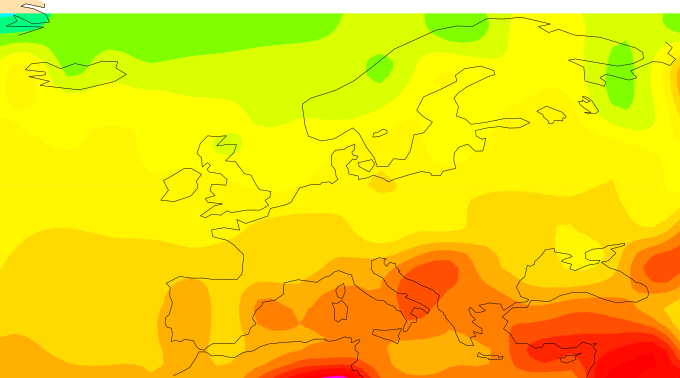

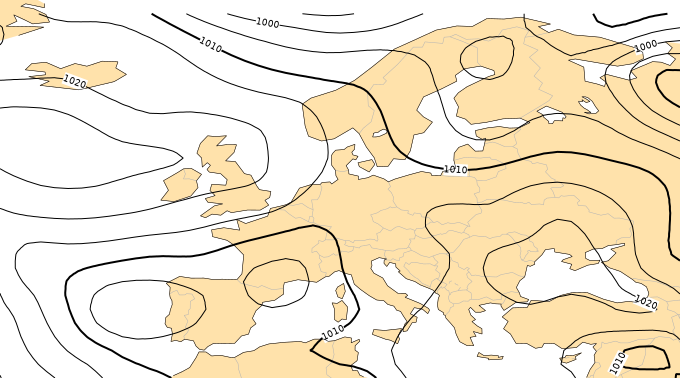

<xarray.Dataset>
Dimensions:     (number: 1, time: 1, step: 1, surface: 1, latitude: 11,
                 longitude: 19)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 2020-05-13T12:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 73.0 69.0 65.0 61.0 ... 45.0 41.0 37.0 33.0
  * longitude   (longitude) float64 -27.0 -23.0 -19.0 -15.0 ... 37.0 41.0 45.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
    msl         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-20T11:17 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
ds = cml.load_source('file', 'test.grib')
for field in ds:
	cml.plot_map(field)
ds.to_xarray()

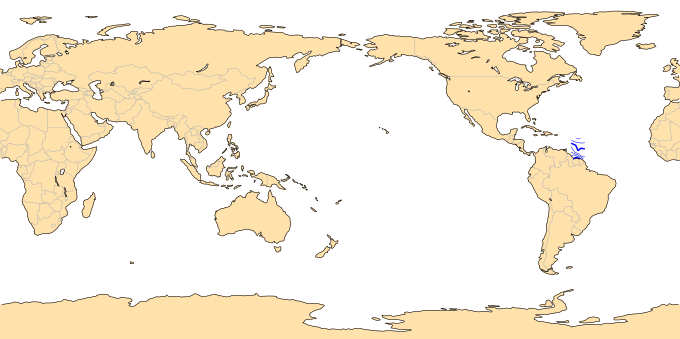

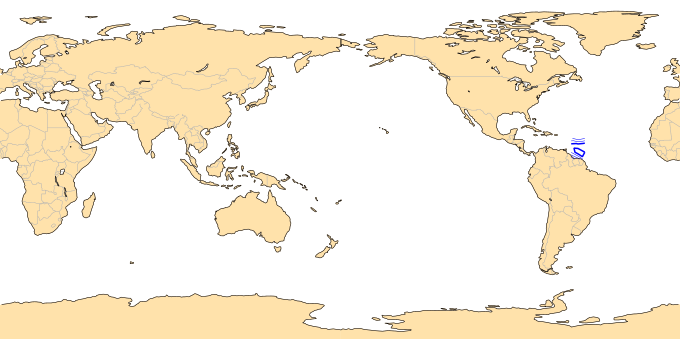

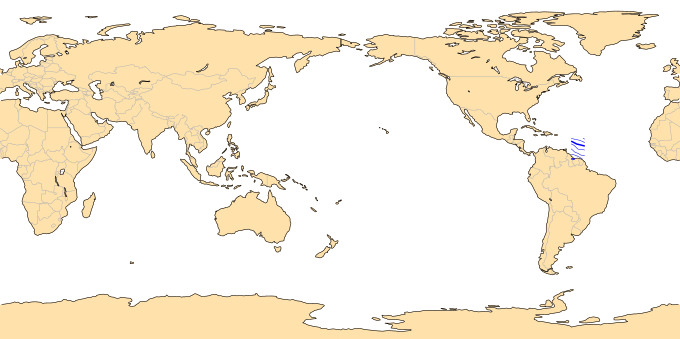

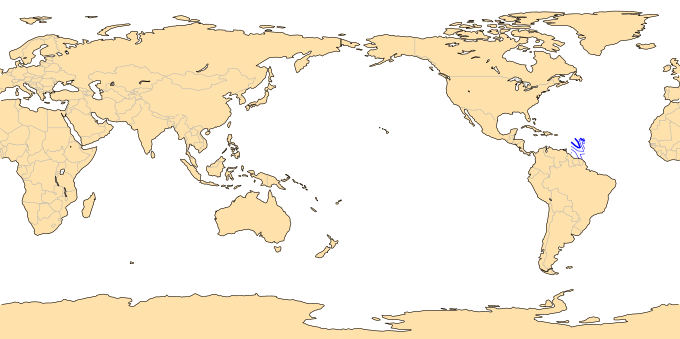

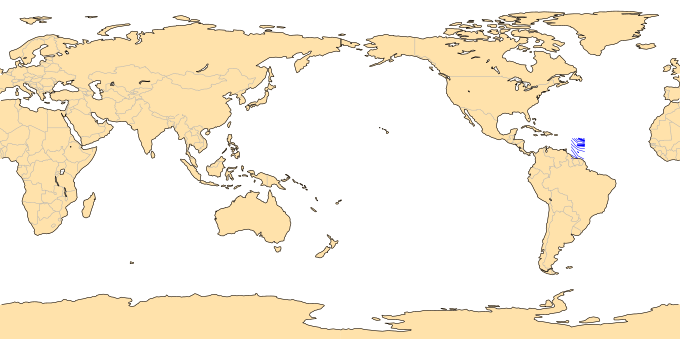

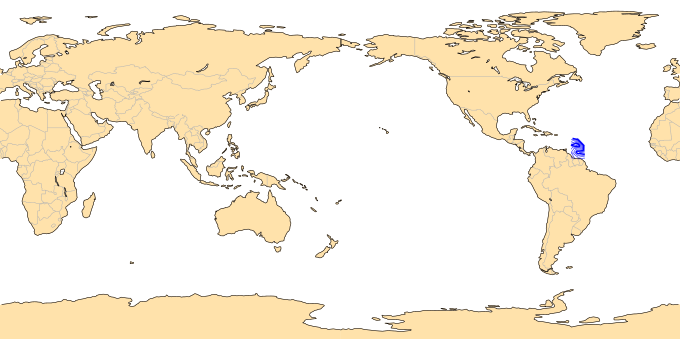

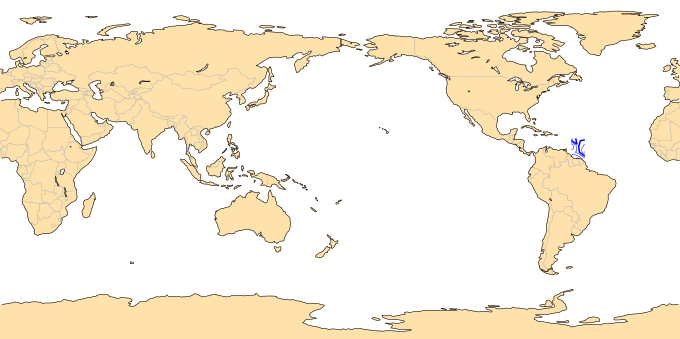

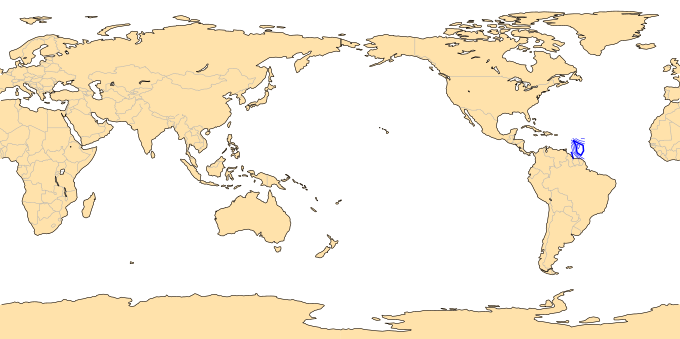

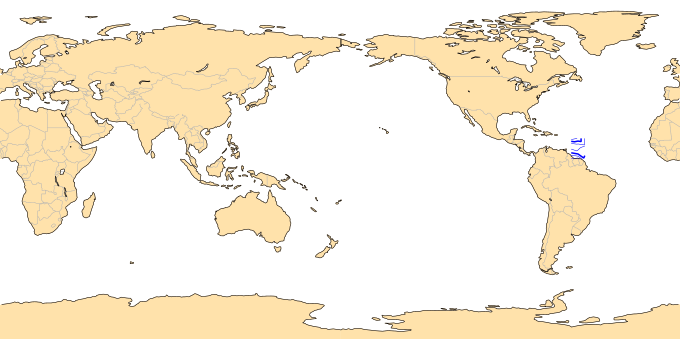

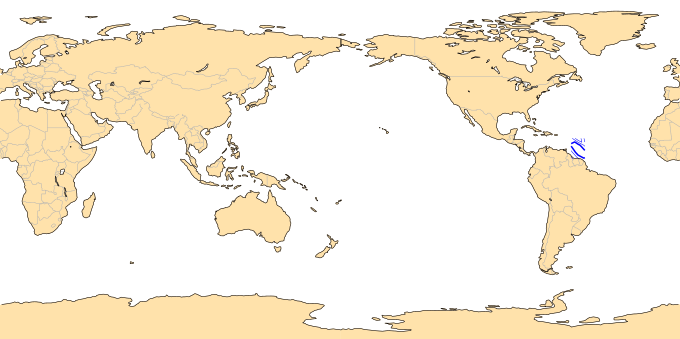

<xarray.Dataset>
Dimensions:    (time: 10, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-20T10:30:00 ... 2020-01-29T10:30:00
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(10, 2), meta=np.ndarray>
    hfls       (time, lat, lon) float32 dask.array<chunksize=(10, 180, 360), meta=np.ndarray>
Attributes:
    CDI:                       Climate Data Interface version 2.0.3 (https://...
    Conventions:               CF-1.6
    source:                    git@gitlab.dkrz.de:icon/icon-aes.git@87a1eaded...
    institution:               Max Planck Institute for Meteorology/Deutscher...
    title:                     ICON simulation
    references:                see MPIM/DWD publications
    comment:                   Sapphire Dyamond (k203123) on l40572 (Linux 4....
    NCO:                       netCDF Operators version 5.0.6 (Homepage = htt...
    history:                   Fri Jul 15 16:15:09 2022: cdo -remapcon,r360x1...
    frequency:                 day
    cdo_openmp_thread_number:  4
    CDO:                       Climate Data Operators version 2.0.3 (https://...

In [7]:
ds = cml.load_source('file', 'test.nc')
for field in ds:
	cml.plot_map(field)
ds.to_xarray()

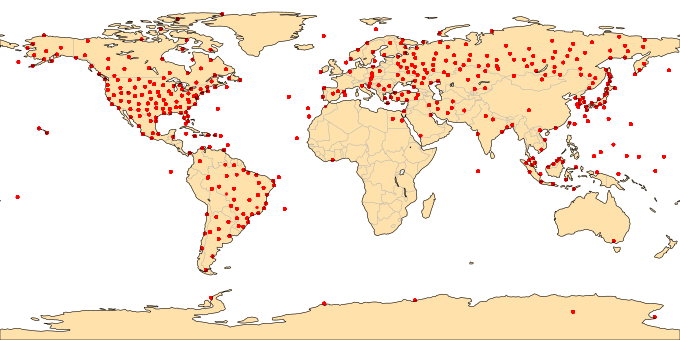

,stationNumber,latitude,longitude,pressure,airTemperature,data_datetime
0,907,58.47,-78.08,100300.0,258.3,2008-12-08 12:00:00
1,907,58.47,-78.08,100000.0,259.7,2008-12-08 12:00:00
2,907,58.47,-78.08,99800.0,261.1,2008-12-08 12:00:00
3,907,58.47,-78.08,99100.0,261.7,2008-12-08 12:00:00
4,907,58.47,-78.08,92500.0,258.1,2008-12-08 12:00:00
...,...,...,...,...,...,...
26000,968,25.03,121.52,10000.0,197.9,2008-12-08 12:00:00
26001,968,25.03,121.52,9520.0,196.3,2008-12-08 12:00:00
26002,968,25.03,121.52,7000.0,201.5,2008-12-08 12:00:00
26003,968,25.03,121.52,5000.0,209.1,2008-12-08 12:00:00


In [8]:
ds = cml.load_source('file', 'temp.bufr')
df = ds.to_pandas(
    columns=(
        "stationNumber",
        "latitude",
        "longitude",
        "data_datetime",
        "pressure",
        "airTemperature",
    ),
    filters={},
)
cml.plot_map(df, projection="global")
df


test.grib:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

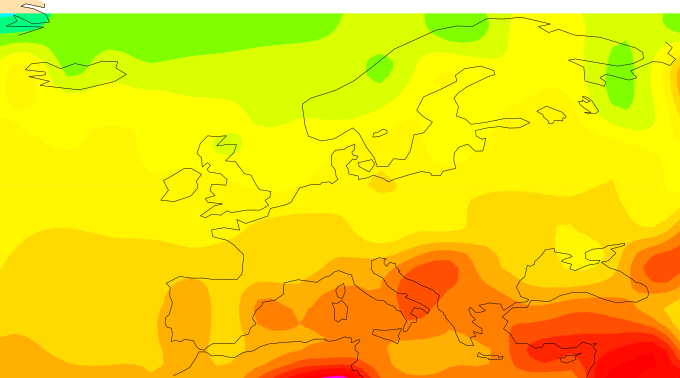

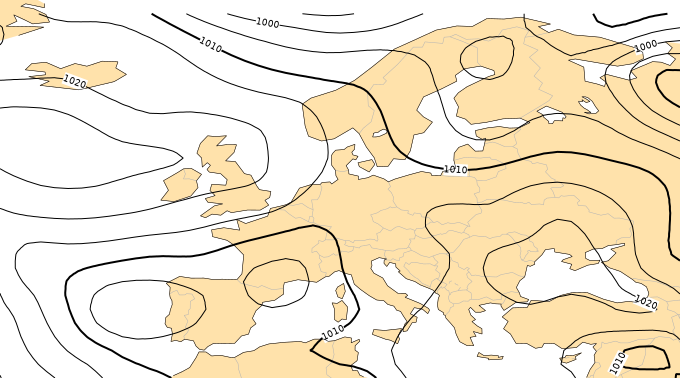

<xarray.Dataset>
Dimensions:     (number: 1, time: 1, step: 1, surface: 1, latitude: 11,
                 longitude: 19)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 2020-05-13T12:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 73.0 69.0 65.0 61.0 ... 45.0 41.0 37.0 33.0
  * longitude   (longitude) float64 -27.0 -23.0 -19.0 -15.0 ... 37.0 41.0 45.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
    msl         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-20T11:20 GRIB to CDM+CF via cfgrib-0.9.1...

In [9]:
ds = cml.load_source('url', 'https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.grib')
for field in ds:
	cml.plot_map(field)
ds.to_xarray()


In [11]:
cml.load_source('url', 'https://github.com/ecmwf/climetlab/raw/main/docs/examples/test.nc')
cml.load_source('url', 'http://download.ecmwf.int/test-data/metview/gallery/temp.bufr')


Home page,-
Documentation,-
Citation,-
Licence,-


In [12]:
# Downloading 32M of data.
URL = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.SP.list.v04r00.csv"
data = cml.load_source("url", URL)
pd = data.to_pandas()

ibtracs.SP.list.v04r00.csv:   0%|          | 0.00/33.2M [00:00<?, ?B/s]

/home/b/b381639/.local/lib/python3.9/site-packages/climetlab/readers/csv.py:146: DtypeWarning: Columns (1,2,8,9,14,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  return pandas.read_csv(self.path, **pandas_read_csv_kwargs)


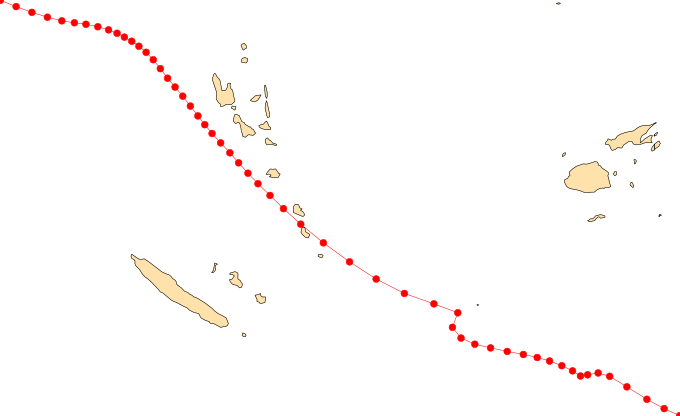

In [13]:
uma = pd[pd.NAME == "UMA:VELI"]
cml.plot_map(uma, style="cyclone-track")

<multiple>:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

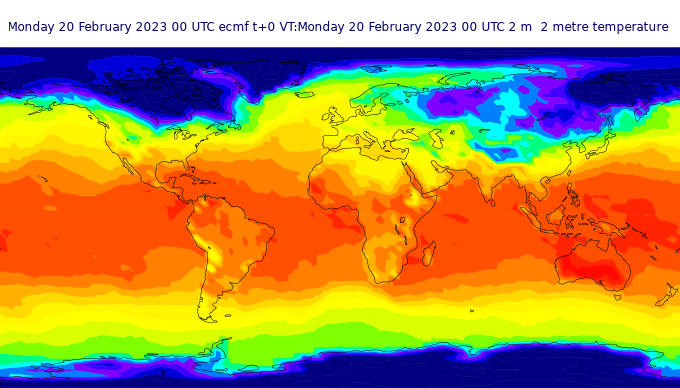

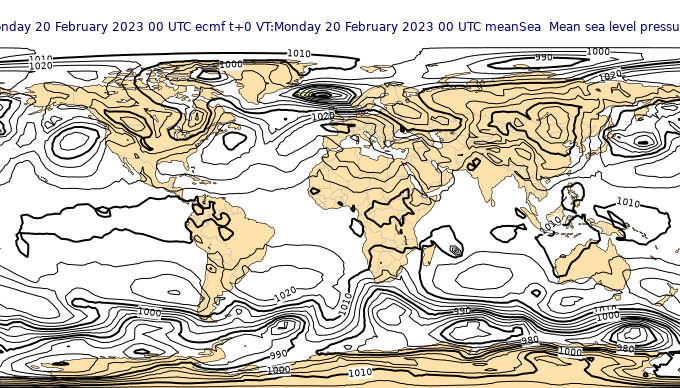

<xarray.Dataset>
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 451,
                        longitude: 900, meanSea: 1)
Coordinates:
  * time               (time) datetime64[ns] 2023-02-20
  * step               (step) timedelta64[ns] 00:00:00
  * heightAboveGround  (heightAboveGround) float64 2.0
  * latitude           (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude          (longitude) float64 -180.0 -179.6 -179.2 ... 179.2 179.6
    valid_time         (time, step) datetime64[ns] ...
  * meanSea            (meanSea) float64 0.0
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 ...
    msl                (time, step, meanSea, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-20T11:23 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
source = cml.load_source(
    "ecmwf-open-data",
    param=["2t", "msl"],
)
for s in source:
    cml.plot_map(s, title=True)
source.to_xarray()

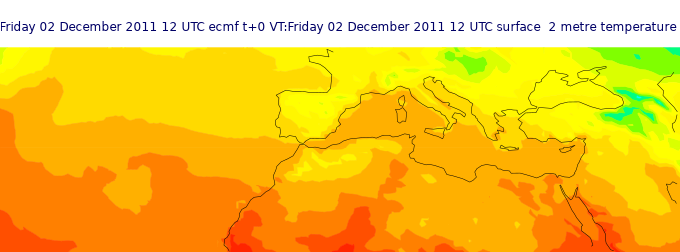

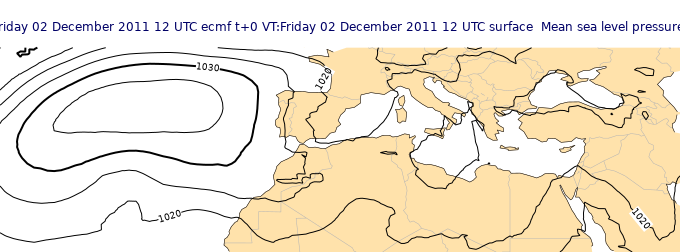

In [17]:
source = cml.load_source(
    "cds",
    "reanalysis-era5-single-levels",
    variable=["2t", "msl"],
    product_type="reanalysis",
    area=[50, -50, 20, 50],
    date="2011-12-02", # ["2011-12-02", "2011-12-03"] for several dates
    time="12:00",
)
for s in source:
    cml.plot_map(s,title=True)

In [25]:
## APIException: "ecmwf.API error 1: User 'fangxing.tian@uib.no' has no access to services/mars"

#source = cml.load_source(
#    "mars",
#    param=["2t", "msl"],
#    levtype="sfc",
#    area=[50, -50, 20, 50],
#    grid=[1, 1],
#    date="2011-12-02",
#   
#)
#for s in source:
#    cml.plot_map(s)
#source.to_xarray()


In [26]:
atlantic = cml.load_dataset("hurricane-database", bassin="atlantic")
df = atlantic.to_pandas()

2023-02-20 12:00:24,120 INFO Downloading https://www.aoml.noaa.gov/hrd/hurdat/hurdat2.txt


hurdat2.txt: 0.00B [00:00, ?B/s]

In [27]:
import climetlab as cml
ds = cml.load_dataset("era5-temperature", 
#    period=(1979, 1999), # This can be long to run.
    period=(1979, 1981),
    domain="France",
    time=12,
 )

2023-02-20 12:00:43,091 INFO Welcome to the CDS
2023-02-20 12:00:43,091 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-02-20 12:00:43,190 INFO Request is completed
2023-02-20 12:00:43,191 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data8/adaptor.mars.internal-1676883391.4539287-11359-16-feeb814e-34cd-459a-9af6-91bf7dc4d312.grib to /tmp/climetlab-b381639/cds-retriever-a0e666107560537dfa3521e4f93592c1559a70df128bb361f05583099b387e95.cache.tmp (2.8M)
2023-02-20 12:00:43,761 INFO Download rate 5M/s     
2023-02-20 12:00:43,884 INFO Welcome to the CDS
2023-02-20 12:00:43,885 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-02-20 12:00:44,124 INFO Request is completed
2023-02-20 12:00:44,125 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data3/adaptor.mars.internal-1676883446.69

In [28]:
ds.to_xarray()

<xarray.Dataset>
Dimensions:     (number: 1, time: 1096, step: 1, surface: 1, latitude: 63,
                 longitude: 63)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 1979-01-01T12:00:00 ... 1981-12-31T12:0...
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 54.5 54.25 54.0 53.75 ... 39.5 39.25 39.0
  * longitude   (longitude) float64 -6.0 -5.75 -5.5 -5.25 ... 8.75 9.0 9.25 9.5
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-20T12:01 GRIB to CDM+CF via cfgrib-0.9.1...

In [29]:
import climetlab as cml
ds = cml.load_dataset("era5-temperature", 
    period=1980,
    domain="France",
    time=12,
 )

In [32]:
import climetlab as cml
cml.load_dataset('hurricane-database') # Asking for an unknown dataset with a typo
# For Github actions: skip

Home page,https://www.aoml.noaa.gov/hrd/hurdat/Data_Storm.html
Documentation,-
Citation,-
Licence,-


In [33]:
import climetlab as cml
data = cml.load_dataset("era5-temperature", 
    period=1980,
    domain="Italy",
    time=6,
)
ds = data.to_xarray()
float(ds.mean().t2m)

2023-02-20 12:04:18,917 INFO Welcome to the CDS
2023-02-20 12:04:18,918 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-02-20 12:04:19,030 INFO Request is completed
2023-02-20 12:04:19,031 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data6/adaptor.mars.internal-1676885927.5990112-29945-8-4b3cb067-1458-425c-995c-007734196320.grib to /tmp/climetlab-b381639/cds-retriever-aa6308824a9555852822234e1accd9c9e28a360d7682a543c22c8dafa837e8e6.cache.tmp (2.8M)
2023-02-20 12:04:19,581 INFO Download rate 5.2M/s   


284.1121520996094